In [6]:
import torch
print(torch.__version__)

import numpy as np
import math
import matplotlib.pyplot as plt

2.1.1


### Simple Polynomial Regression using NumPy

Following the [PyTorch beginner tutorial](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html), we will try to fit $y=\sin(x)$ using the 3rd order polynomial $y = a + bx + cx^2 + dx^3$. The network will have 4 parameters (a,b,c,d), and will be trained using gradient descent to fit random data by minimizing the Euclidean distance between the network output and the true output. We will implement the network using NumPy before introducing PyTorch. 

**Gradients**: Euclidean distance in 2D can be expressed by $d = \sqrt{\left( x_1 - x_2\right)^2 + \left( y_1 - y_2\right)^2}$, and in n-dimensional space, we generalize this to $d(x,y) = \sqrt{\sum_{i=1}^n \left(x_i - y_i\right)^2}$. As gradients indicate the direction of steepest change, the gradient of a loss function points towards the direction where loss increases most rapidly. To train the model, we must minimize the loss function (so predicted y-values are close to actual y-values), and we use  gradients to find which direction to adjust model parameters ($a,b,c,d$). Defining our loss function as 
$$
\mathcal{L} = \sum_{i=1}^n \left(x_i - y_i\right)^2,
$$
we can take the gradient of the loss function with respect to predicted values $x_i$
$$
\nabla \mathcal{L} = \frac{\partial}{\partial x_i} \sum_{i=1}^n \left(x_i - y_i\right)^2 = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot \frac{\partial}{\partial x_i} \left(x_i - y_i\right) ,
$$
$$
\nabla \mathcal{L} = 2 \sum_{i=1}^n \left(x_i - y_i\right)
$$

**Chain Rule**: To carry out backpropogation is to answer the question: "If I slightly tweak this parameter, how will my error change?" To understand how changing one variable (parameter) affects the outcome of the function (loss), we must apply the chain rule: 
$$
\frac{\partial \mathcal{L}}{\partial x_i} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial x_i}
$$

$$
y_{pred} = a + bx + cx^2 + dx^3 \rightarrow \begin{cases}
\frac{\partial y_{pred}}{\partial a} = 1\\
\frac{\partial y_{pred}}{\partial b} = x \\
\frac{\partial y_{pred}}{\partial c} = x^2 \\
\frac{\partial y_{pred}}{\partial d} = x^3 \\
\end{cases}
$$

We can now calculate gradients for each parameter:

$$
\frac{\partial \mathcal{L}}{\partial a} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial a} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot 1
$$
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial b} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x
$$
$$
\frac{\partial \mathcal{L}}{\partial c} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial c} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x^2
$$
$$
\frac{\partial \mathcal{L}}{\partial d} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial d} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x^3
$$
A positive gradient means that increasing the parameter will increase the loss, and a larger gradient means a change to that parameter will have a larger impact on the loss. We can now update parameters through these gradients and a fixed learning rate (small positive integer), as iteratively calculating gradients at each step allows parameters to "learn" by adjusting themselves to minimize loss. 

Initial parameter values: -0.1347065353499879 1.682024182543488 -1.7671046989314358 0.26024754169666625
0 187276.654381757
75 779.5866986487189
150 656.7421524141782
225 566.8451172032285
300 500.8188819890178
375 452.3209906346599
450 416.6950749266227
525 390.52241512032754
600 371.29281759692753
675 357.1630510420646
750 346.77953903378886
825 339.148210276075
900 333.53895920671863
975 329.415509308381
1050 326.38392191817786
1125 324.1547914465235
1200 322.51548739174035
1275 321.3097718175118
1350 320.4228315480237
1425 319.77028583258755
1500 319.2901129719151
1575 318.9367203139934
1650 318.6765882178666
1725 318.4850699334496
1800 318.34404044648795
1875 318.24016889782223
1950 318.1636490633553
Result: y = 0.018965948326567707 + 0.8692224939638834x + -0.0022019981458324496x^2 + -0.09516017341065434x^3


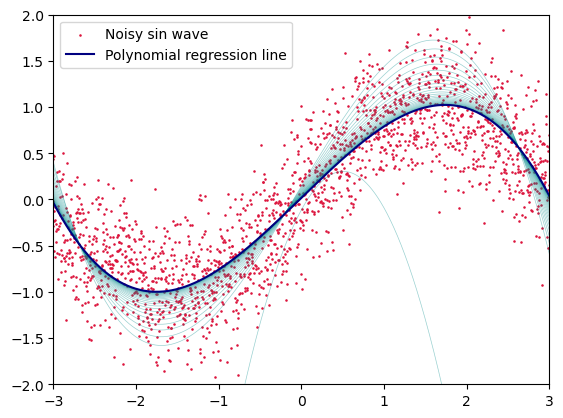

In [18]:
def result(x,a,b,c,d): return a + b * x + c * x ** 2 + d * x ** 3

x = np.linspace(-math.pi, math.pi, 2000)             # Create a noisy sin wave, represented by y
noise = np.random.normal(0, 0.4, len(x))
y = np.sin(x) + noise

a = np.random.randn()                                # Randomly initialize weights                     
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

print("Initial parameter values:",a,b,c,d)

learning_rate = 1e-6                                 
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3     # Forward pass: compute predicted y
    
    loss = np.square(y_pred - y).sum()               # Compute and print loss (Euclidean distance)
    if t % 75 == 0:
        print(t, loss)
                                                     
    grad_y_pred = 2 * (y_pred - y)                   # Backpropogation to compute gradients of parameters w/ respect to loss
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a -= learning_rate * grad_a                      # Updating parameters
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
    if t % 75 == 0:
        y_running = result(x,a,b,c,d)
        plt.plot(x,y_running, alpha = 0.4, linewidth=0.5, c = "darkcyan")

print(f'Result: y = {a} + {b}x + {c}x^2 + {d}x^3')    

y_approx = result(x,a,b,c,d)

plt.scatter(x,y, c = "crimson", label = "Noisy sin wave", s = 0.7)
plt.plot(x,y_approx, c = "navy", label = "Polynomial regression line")
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.legend()
plt.show()

Note that by simply removing parameters $c$ and $d$, we can use the same loss function to now perform linear regression. 

Initial parameter values: 0.6891692358002531 0.5232933987774457
0 137282.7801172151
75 75978.39996672765
150 75976.15179359766
225 75976.1285864527
300 75976.12834580494
375 75976.12834330952
450 75976.12834328366
525 75976.12834328337
600 75976.12834328339
675 75976.12834328337
750 75976.12834328339
825 75976.12834328337
900 75976.12834328339
975 75976.12834328337
1050 75976.12834328339
1125 75976.12834328339
1200 75976.12834328339
1275 75976.12834328339
1350 75976.12834328339
1425 75976.12834328339
1500 75976.12834328339
1575 75976.12834328339
1650 75976.12834328339
1725 75976.12834328339
1800 75976.12834328339
1875 75976.12834328339
1950 75976.12834328339
Result: y = 0.30786770525777646 + 4.039347580979977x


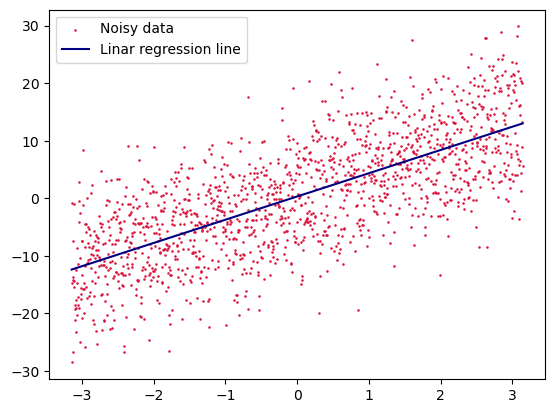

In [10]:
def result(x,a,b): return a + b * x

x = np.linspace(-math.pi, math.pi, 1500)            
noise = np.random.normal(0, 7, len(x))
y = 4 * x + noise

a = np.random.randn()                                                
b = np.random.randn()

print("Initial parameter values:",a,b)

learning_rate = 1e-5                                            # Accelerated learning rate                                 
for t in range(2000):
    y_pred = a + b * x                               
    
    loss = np.square(y_pred - y).sum()               
    if t % 75 == 0:
        print(t, loss)
                                                     
    grad_y_pred = 2 * (y_pred - y)                   
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
 
    a -= learning_rate * grad_a                     
    b -= learning_rate * grad_b

print(f'Result: y = {a} + {b}x')    

y_approx = result(x,a,b)

plt.scatter(x,y, c = "crimson", label = "Noisy data", s = 0.7)
plt.plot(x,y_approx, c = "navy", label = "Linar regression line")
plt.legend()
plt.show()

### Introducing PyTorch Tensors

We now replicate the original code, fitting a third-order polynomial to the sine function through PyTorch Tensors. For simplicity, we'll remove numerical noise. 

Initial parameter values: tensor(0.3062) tensor(-0.9308) tensor(0.9404) tensor(0.8955)
0 190928.515625
75 2782.8251953125
150 2043.378662109375
225 1501.132568359375
300 1103.419677734375
375 811.711669921875
450 597.7518310546875
525 440.8161315917969
600 325.7052307128906
675 241.27090454101562
750 179.33724975585938
825 133.90724182128906
900 100.58248901367188
975 76.13703918457031
1050 58.20476531982422
1125 45.050086975097656
1200 35.39996337890625
1275 28.320526123046875
1350 23.12685203552246
1425 19.316564559936523
1500 16.52107810974121
1575 14.470073699951172
1650 12.965224266052246
1725 11.86111831665039
1800 11.050956726074219
1875 10.4564790725708
1950 10.020272254943848
Result: y = 0.00440277298912406 + 0.826533317565918x + -0.0007595535716973245x^2 + -0.08903363347053528x^3


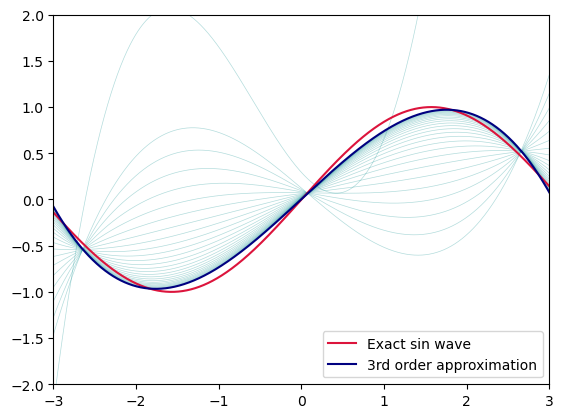

In [28]:
def result(x,a,b,c,d): return a + b * x + c * x ** 2 + d * x ** 3

dtype = torch.float                                             # Each torch.Tensor has a torch.dtype, torch.device, and torch.layout
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, dtype = dtype, device = device)
y = torch.sin(x)

a = torch.randn((), dtype = dtype, device = device)
b = torch.randn((), dtype = dtype, device = device)
c = torch.randn((), dtype = dtype, device = device)
d = torch.randn((), dtype = dtype, device = device)

print("Initial parameter values:",a,b,c,d)

learning_rate = 1e-6                   
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3                 # Forward pass
    
    loss = (y_pred - y).pow(2).sum().item()                      # .item() converts PyTorch tensor to Python number
    if t % 75 == 0:
        print(t, loss)
                                                     
    grad_y_pred = 2 * (y_pred - y)                               # Backpropogation                
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a -= learning_rate * grad_a                                  # Updating weights through gradient descent          
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
    if t % 75 == 0:
        y_running = result(x,a,b,c,d)
        plt.plot(x,y_running, alpha = 0.3, linewidth=0.5, c="darkcyan")

print(f'Result: y = {a} + {b}x + {c}x^2 + {d}x^3')    

y_approx = result(x,a,b,c,d)

plt.plot(x,y, c = "crimson", label = "Exact sin wave")
plt.plot(x,y_approx, c = "navy", label = "3rd order approximation")
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.legend()
plt.show()